In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/india-gdp-rate-19602022/India GDP 1960-2022.csv


In [3]:
# Read the CSV file in pandas
GDP_df = pd.read_csv("/kaggle/input/india-gdp-rate-19602022/India GDP 1960-2022.csv")

In [4]:
GDP_df.head()

,Unnamed: 0,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,NaN,Year,GDP,Per Capita,Growth
1,0.0,2021,"$3,173.40B","$2,277",8.95%
2,1.0,2020,"$2,667.69B","$1,933",-6.60%
3,2.0,2019,"$2,831.55B","$2,072",3.74%
4,3.0,2018,"$2,702.93B","$1,998",6.45%


In [5]:
GDP_df.info()

# Checking For Null Values 
GDP_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     62 non-null     float64
 1   India GDP - Historical Data    63 non-null     object 
 2   India GDP - Historical Data.1  63 non-null     object 
 3   India GDP - Historical Data.2  63 non-null     object 
 4   India GDP - Historical Data.3  63 non-null     object 
dtypes: float64(1), object(4)
memory usage: 2.6+ KB


Unnamed: 0                       1
India GDP - Historical Data      0
India GDP - Historical Data.1    0
India GDP - Historical Data.2    0
India GDP - Historical Data.3    0
dtype: int64

In [6]:
# drop the first col named Unnamed: 0
GDP_df.drop(['Unnamed: 0'], axis=1, inplace=True)


In [7]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   India GDP - Historical Data    63 non-null     object
 1   India GDP - Historical Data.1  63 non-null     object
 2   India GDP - Historical Data.2  63 non-null     object
 3   India GDP - Historical Data.3  63 non-null     object
dtypes: object(4)
memory usage: 2.1+ KB


In [8]:
GDP_df.head()

,India GDP - Historical Data,India GDP - Historical Data.1,India GDP - Historical Data.2,India GDP - Historical Data.3
0,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%


In [9]:
# Renaming The Columns
GDP_df.rename(columns={
        'India GDP - Historical Data' : 'Year', 
        'India GDP - Historical Data.1' : 'GDP', 
        'India GDP - Historical Data.2' : 'Per Capita', 
        'India GDP - Historical Data.3': 'Growth'   
                  }, inplace=True)

In [10]:
# drop the first row i.e. with index 0 
GDP_df.drop([0], axis=0, inplace=True)
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 1 to 62
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        62 non-null     object
 1   GDP         62 non-null     object
 2   Per Capita  62 non-null     object
 3   Growth      62 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


In [11]:
GDP_df.head()

,Year,GDP,Per Capita,Growth
1,2021,"$3,173.40B","$2,277",8.95%
2,2020,"$2,667.69B","$1,933",-6.60%
3,2019,"$2,831.55B","$2,072",3.74%
4,2018,"$2,702.93B","$1,998",6.45%
5,2017,"$2,651.47B","$1,981",6.80%


In [12]:
GDP_df.tail()

,Year,GDP,Per Capita,Growth
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%
62,1960,$37.03B,$82,%


In [13]:
# drop the last row 
GDP_df.drop([GDP_df['Year'].count()], axis=0, inplace=True)
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        61 non-null     object
 1   GDP         61 non-null     object
 2   Per Capita  61 non-null     object
 3   Growth      61 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


In [14]:
GDP_df.tail()

,Year,GDP,Per Capita,Growth
57,1965,$59.55B,$119,-2.64%
58,1964,$56.48B,$116,7.45%
59,1963,$48.42B,$101,5.99%
60,1962,$42.16B,$90,2.93%
61,1961,$39.23B,$85,3.72%


In [15]:
# reverse the df for better plot visualization  
GDP_df = GDP_df.reindex(index=GDP_df.index[::-1])
GDP_df.head()

,Year,GDP,Per Capita,Growth
61,1961,$39.23B,$85,3.72%
60,1962,$42.16B,$90,2.93%
59,1963,$48.42B,$101,5.99%
58,1964,$56.48B,$116,7.45%
57,1965,$59.55B,$119,-2.64%


In [16]:
# clean data as to plot graphs using matplotlib
# make data
years = GDP_df['Year'].to_list()
years = list(map(int, years))

# function to remove % char from string and convert to float 
def remove_per(str1):
    num = str1.split('%')[0]
    return float(num)

growth = GDP_df['Growth'].to_list()
growth = list(map(remove_per, growth))

# function to remove $ , and B chars from string and convert to float 
def cleanGDP(str1):
    str1 = str1.replace('$', '')
    str1 = str1.replace(',', '')
    str1 = str1.replace('B', '')
    num = float(str1)
    return num

gdp = GDP_df['GDP'].to_list()
gdp = list(map(cleanGDP, gdp))


per_capita = GDP_df['Per Capita'].to_list()
per_capita = list(map(cleanGDP, per_capita))




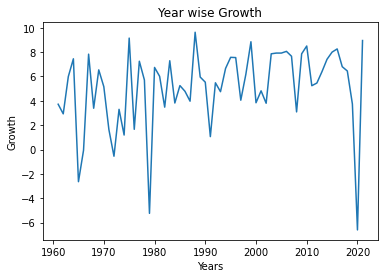

In [17]:
# plot Year wise Growth 
fig, ax = plt.subplots()
ax.plot(years, growth)
plt.xlabel("Years")
plt.ylabel("Growth")
plt.title("Year wise Growth")
plt.show()

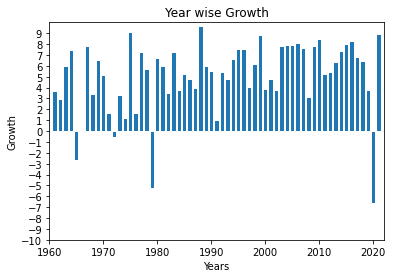

In [18]:
# plot a bar graph for Year wise Growth
fig, ax = plt.subplots()
ax.bar(years, growth, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("Growth")
plt.title("Year wise Growth")
ax.set(xlim=(1960, 2022),
       ylim=(-10, 10), yticks=np.arange(-10,10))
plt.show()

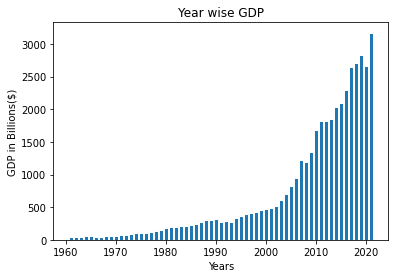

In [19]:
# plot a bar graph for year wise GDP
fig, ax = plt.subplots()
ax.bar(years, gdp, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("GDP in Billions($)")
plt.title("Year wise GDP")
plt.show()

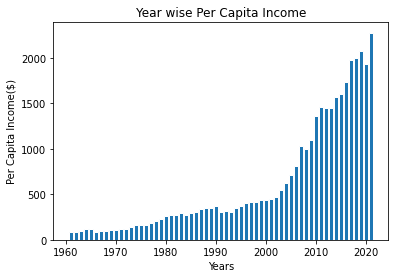

In [20]:
# plot a bar graph for Year wise Per Capita Income
fig, ax = plt.subplots()
ax.bar(years, per_capita, edgecolor="white")
plt.xlabel("Years")
plt.ylabel("Per Capita Income($)")
plt.title("Year wise Per Capita Income")
plt.show()


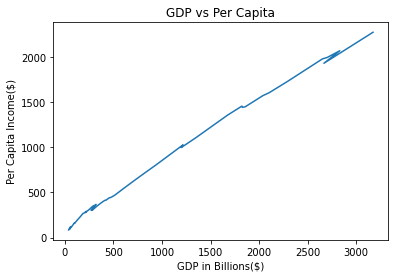

In [21]:
# plot a graph for GDP vs Per Capita
fig, ax = plt.subplots()
ax.plot(gdp, per_capita)
plt.xlabel("GDP in Billions($)")
plt.ylabel("Per Capita Income($)")
plt.title("GDP vs Per Capita")
plt.show()

In [22]:
GDP_df.head()

,Year,GDP,Per Capita,Growth
61,1961,$39.23B,$85,3.72%
60,1962,$42.16B,$90,2.93%
59,1963,$48.42B,$101,5.99%
58,1964,$56.48B,$116,7.45%
57,1965,$59.55B,$119,-2.64%


In [23]:
# Cleaning and converting the data for data analysis 

# remove $ and B char from the GDP string and convert to float
GDP_df['GDP'] = GDP_df['GDP'].replace('[\$\,\"B"]', '', regex=True).astype(float)

# remove $ from Per Capita string and convert to float

GDP_df['Per Capita'] = GDP_df['Per Capita'].replace('[\$\,\.]', '', regex=True).astype(float)

# remove % char from the Growth string and convert to float
GDP_df['Growth'] = GDP_df['Growth'].replace('[\%]', '', regex=True).astype(float)
GDP_df.head()


,Year,GDP,Per Capita,Growth
61,1961,39.23,85.0,3.72
60,1962,42.16,90.0,2.93
59,1963,48.42,101.0,5.99
58,1964,56.48,116.0,7.45
57,1965,59.55,119.0,-2.64


In [24]:
# Find the min groowth data
GDP_df[GDP_df['Growth'] == GDP_df['Growth'].min()]

,Year,GDP,Per Capita,Growth
2,2020,2667.69,1933.0,-6.6


**We can see that the 2020 was the year with lowest growth i.e. -6.6% from 1961. This may be because of the COVID-19 pandamic.**

In [25]:
GDP_df.sort_values(by=['Growth']).head(3)

,Year,GDP,Per Capita,Growth
2,2020,2667.69,1933.0,-6.60
43,1979,152.99,224.0,-5.24
57,1965,59.55,119.0,-2.64


**We can see that 2020, 1979 and 1965 are the top three years with lowest growth. 
1965 was India - Pakistan War,
1979 had severe drought gripping most of the country and crude oil prices almost doubling due to Iranian Revolution which caused a disruption of oil supply. Also, India just came out of emergency(9175-1977), 
2020 was hit by the COVID 19 pandamic.**

In [26]:
GDP_df[GDP_df['Growth'] == GDP_df['Growth'].max()]

,Year,GDP,Per Capita,Growth
34,1988,296.59,354.0,9.63


**1988 was the year with highest growth of 9.33%**

In [27]:
GDP_df.sort_values(by=['Growth'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
34,1988,296.59,354.0,9.63
47,1975,98.47,158.0,9.15
1,2021,3173.40,2277.0,8.95
23,1999,458.82,442.0,8.85
12,2010,1675.62,1358.0,8.50


**1988, 1975, 2021, 1999, 2010 were the top five years with highest growth.**

In [28]:
# Year with highest GDP in Indian History
GDP_df[GDP_df['GDP'] == GDP_df['GDP'].max()]

,Year,GDP,Per Capita,Growth
1,2021,3173.4,2277.0,8.95


In [29]:
# Top 5 years with higehst GDP 
GDP_df.sort_values(by=['GDP'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
1,2021,3173.40,2277.0,8.95
3,2019,2831.55,2072.0,3.74
4,2018,2702.93,1998.0,6.45
2,2020,2667.69,1933.0,-6.60
5,2017,2651.47,1981.0,6.80


In [30]:
# Year with highest Per Capita in Indian History
GDP_df[GDP_df['Per Capita'] == GDP_df['Per Capita'].max()]

,Year,GDP,Per Capita,Growth
1,2021,3173.4,2277.0,8.95


**The Year 2021 is the year with highest GDP Per Capita Income of $2277**

In [31]:
# Top 5 years with higehst Per Capita income 
GDP_df.sort_values(by=['Per Capita'], ascending=False).head(5)

,Year,GDP,Per Capita,Growth
1,2021,3173.40,2277.0,8.95
3,2019,2831.55,2072.0,3.74
4,2018,2702.93,1998.0,6.45
5,2017,2651.47,1981.0,6.80
2,2020,2667.69,1933.0,-6.60
